<a href="https://colab.research.google.com/github/AnfieldGank14/afrialdi-saputra/blob/master/1800018197-AFRIALDI%20SAPUTRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Menghitung jumlah perbandingan pengunjung anak-anak diantara resort hotel dan city hotel berdasarkan tahun pemesanan.**

NIM : 1800018197

NAMA : AFRIALDI SAPUTRA

In [1]:
! apt-get install openjdk-8-jdk-headless -qq > /dev/null
! wget -q https://downloads.apache.org/spark/spark-2.4.6/spark-2.4.6-bin-hadoop2.7.tgz
! tar xf spark-2.4.6-bin-hadoop2.7.tgz
! pip install -q findspark
! pip install pyspark_dist_explore

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [3]:
import findspark
findspark.init("spark-2.4.6-bin-hadoop2.7")# SPARK_HOME
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
from pyspark.sql.functions import col, avg
from matplotlib import pyplot as plt
from pyspark_dist_explore import Histogram, hist

In [4]:
sc = spark.sparkContext
spark = SparkSession(sc)

**LOAD DATASET**

In [6]:
data = spark.read.csv('hotel_bookings.csv', header=True, inferSchema=True)
data.printSchema()

root
 |-- hotel: string (nullable = true)
 |-- is_canceled: integer (nullable = true)
 |-- lead_time: integer (nullable = true)
 |-- arrival_date_year: integer (nullable = true)
 |-- arrival_date_month: string (nullable = true)
 |-- arrival_date_week_number: integer (nullable = true)
 |-- arrival_date_day_of_month: integer (nullable = true)
 |-- stays_in_weekend_nights: integer (nullable = true)
 |-- stays_in_week_nights: integer (nullable = true)
 |-- adults: integer (nullable = true)
 |-- children: string (nullable = true)
 |-- babies: integer (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)
 |-- market_segment: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: integer (nullable = true)
 |-- previous_cancellations: integer (nullable = true)
 |-- previous_bookings_not_canceled: integer (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: string (nullab

**1. PROSES EDA (Exploratory Data Analysis)**

A. MENAMPILKAN JUMLAH PENGUNJUNG HOTEL

In [7]:
print("DATA PENGUNJUNG HOTEL : ", data.count())

DATA PENGUNJUNG HOTEL :  43917


B. MELIHAT 10 DATA PENGUNJUNG TERATAS

In [8]:
data.show(10)


+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+-----+---------------------------+-------------------------+------------------+-----------------------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type|  adr|required_car_parking_spaces|tota

C. STATISTIK DATA PENGUNJUNG HOTEL

In [9]:
data.describe().show()

+-------+------------+-------------------+-----------------+------------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------------------+-------------------+--------------------+---------+-------+--------------+--------------------+-------------------+----------------------+------------------------------+------------------+------------------+-------------------+------------+------------------+------------------+--------------------+---------------+------------------+---------------------------+-------------------------+------------------+
|summary|       hotel|        is_canceled|        lead_time| arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|            adults|           children|              babies|     meal|country|market_segment|distribution_channel|  is_repeated_guest|previous_cancellations|previous_bookings_not_cancel

D. PERSEBARAN DATA PADA MASING-MASING KOLOM

In [11]:
data_hotel = data.select('hotel')
# fig, axes = plt.subplots()
# fig.set_size_inches(5, 5)
# hist(axes, data_hotel, bins=20, color="red")
# plt.show()

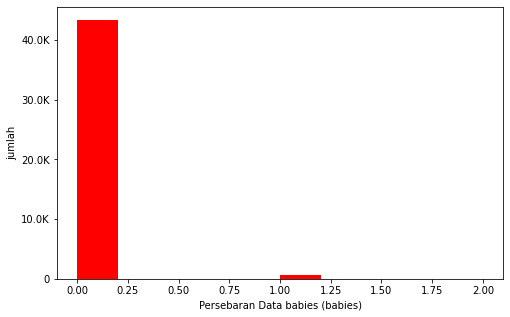

In [77]:
data_babies = data.select('babies')

fig, axes = plt.subplots()
fig.set_size_inches(8, 5)
hist(axes, data_babies, color="red")
plt.xlabel('Persebaran Data babies (babies)')
plt.ylabel('jumlah')

plt.show()

E. MENGECEK APAKAH DATA ADA YANG NULL

In [17]:
table = ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','meal','country','market_segment','distribution_channel','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','reserved_room_type','assigned_room_type','deposit_type','agent','company','days_in_waiting_list','customer_type','adr','required_car_parking_spaces','total_of_special_requests','reservation_status','reservation_status_date']

for kolom in table:
  print('jumlah data yang bernilai null pada colom ', kolom, ' : ', data.where(col(kolom).isNull()).count())

jumlah data yang bernilai null pada colom  hotel  :  0
jumlah data yang bernilai null pada colom  is_canceled  :  0
jumlah data yang bernilai null pada colom  lead_time  :  0
jumlah data yang bernilai null pada colom  arrival_date_year  :  0
jumlah data yang bernilai null pada colom  arrival_date_month  :  0
jumlah data yang bernilai null pada colom  arrival_date_week_number  :  0
jumlah data yang bernilai null pada colom  arrival_date_day_of_month  :  0
jumlah data yang bernilai null pada colom  stays_in_weekend_nights  :  0
jumlah data yang bernilai null pada colom  stays_in_week_nights  :  0
jumlah data yang bernilai null pada colom  adults  :  0
jumlah data yang bernilai null pada colom  children  :  0
jumlah data yang bernilai null pada colom  babies  :  0
jumlah data yang bernilai null pada colom  meal  :  0
jumlah data yang bernilai null pada colom  country  :  0
jumlah data yang bernilai null pada colom  market_segment  :  0
jumlah data yang bernilai null pada colom  distributi

Tidak ditemukan data null, jadi bisa lanjut ke proses selanjutnya.

**2. PROCESSING DATA**

In [66]:
data_hotel = data.select('hotel', 'arrival_date_year', 'children', 'adults')
data_hotel.show(20)

+------------+-----------------+--------+------+
|       hotel|arrival_date_year|children|adults|
+------------+-----------------+--------+------+
|Resort Hotel|             2015|       0|     2|
|Resort Hotel|             2015|       0|     2|
|Resort Hotel|             2015|       0|     1|
|Resort Hotel|             2015|       0|     1|
|Resort Hotel|             2015|       0|     2|
|Resort Hotel|             2015|       0|     2|
|Resort Hotel|             2015|       0|     2|
|Resort Hotel|             2015|       0|     2|
|Resort Hotel|             2015|       0|     2|
|Resort Hotel|             2015|       0|     2|
|Resort Hotel|             2015|       0|     2|
|Resort Hotel|             2015|       0|     2|
|Resort Hotel|             2015|       0|     2|
|Resort Hotel|             2015|       1|     2|
|Resort Hotel|             2015|       0|     2|
|Resort Hotel|             2015|       0|     2|
|Resort Hotel|             2015|       0|     2|
|Resort Hotel|      

**3. PEMROSESAN DATA**

Disini, akan dilakukan perbandingan pengunjung anak-anak di Resort Hotel dan City Hotel

**HOTEL**

In [71]:
ResortHotel = data.filter(data.hotel == 'Resort Hotel')
cityHotel = data.filter(data.hotel == 'City Hotel')

resort_hotel_children = ResortHotel.filter(ResortHotel.children > 0)
resort_hotel_children.show()

resort_city_children = cityHotel.filter(cityHotel.children > 0)
resort_city_children.show()

#membuat table (view)
resort_hotel_children.createOrReplaceTempView("RH")
resort_city_children.createOrReplaceTempView("CH")

jumlah = spark.sql("SELECT COUNT(children) FROM RH").show()
jumlah2 = spark.sql("SELECT COUNT(children) FROM CH").show()

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+------+---------------------------+-------------------------+------------------+-----------------------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type|   adr|required_car_parking_spaces|to

**4. VISUALISASI DATA**

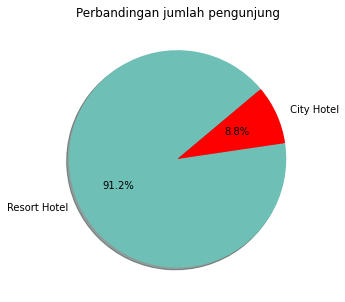

In [73]:
# plotting data
fig, axes = plt.subplots()

# jumlah pengunjung Hotel
fig.set_size_inches(7, 5)

plt.title('Perbandingan jumlah pengunjung')
plt.pie([ResortHotel.count(), cityHotel.count()], labels=['Resort Hotel', ' City Hotel'], autopct='%1.1f%%', shadow=True, startangle=40, colors=['#6ebfb5', 'red'])
print('\n')